# Take a look at the fractions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at
import seaborn as sns

In [82]:
sns.set_context("talk")


In [2]:
import sys
sys.path.append('/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/')

from file_loc import FileLocs
fl = FileLocs()
file_base = fl.data_loc+'tmp/tng/{type}_{prop}.npy'

In [3]:
label1 = ['Cluster', 'Infall', 'Interlopers']
label2 = ['Cluster+Infall', 'Cluster+Interlopers', 'Infall+Interlopers']


In [4]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

labels = labels_mpr+labels_bpt

In [5]:
columnsA = ['fo_%s'%li for li in labels]

In [6]:
cat0 = at.read('../data/TNG300-1_GalEvol_z0p00_cluster_post_frac.csv')
cat1 = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')

In [7]:
df = cat0.to_pandas()
df2 = cat1.to_pandas()

In [8]:
def get_columns(mytpe):
    columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
    columnsA += ['qf1_%s'%(mytpe),'qf2_%s'%(mytpe),'qf3_%s'%(mytpe)]
    return columnsA

In [9]:
mytpe = 'quenching'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_quenching,fi_quenching,fn_quenching,qf1_quenching,qf2_quenching,qf3_quenching
count,280.000000,280.000000,280.000000,279.000000,279.000000,279.000000
mean,0.895737,0.749259,0.649517,0.564345,0.655621,0.202130
std,0.069773,0.095812,0.133167,0.315340,0.300163,0.411963
min,0.531695,0.469087,0.177596,-1.365540,-1.654003,-2.466369
16%,0.833172,0.658541,0.519946,0.347093,0.458232,-0.078647
50%,0.910134,0.757145,0.652184,0.610631,0.717353,0.285930
84%,0.958657,0.841021,0.787419,0.824288,0.883677,0.501457
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.961103


In [10]:
mytpe = 'bulge'
columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
df[columnsA].describe(percentiles=[.16,.50,.84])

,fo_bulge,fi_bulge,fn_bulge
count,280.000000,280.000000,280.000000
mean,0.638764,0.609733,0.604212
std,0.031662,0.028204,0.033442
min,0.531384,0.535671,0.502258
16%,0.610186,0.581838,0.569287
50%,0.638571,0.611078,0.605795
84%,0.667164,0.635467,0.635084
max,0.759555,0.740212,0.709973


In [11]:
columns=['fo_quenching','fo_bulge','fi_quenching','fi_bulge','fn_quenching', 'fn_bulge']
df2[columns].describe(percentiles=[.16,.50,.84])

,fo_quenching,fo_bulge,fi_quenching,fi_bulge,fn_quenching,fn_bulge
count,318.000000,318.000000,319.000000,319.000000,317.000000,317.000000
mean,0.820380,0.613063,0.705229,0.544245,0.616381,0.511489
std,0.113451,0.113611,0.112369,0.087575,0.181009,0.143441
min,0.327381,0.044945,0.200803,0.191649,0.000000,0.013779
16%,0.735507,0.515318,0.595992,0.464534,0.460689,0.379055
50%,0.833215,0.620037,0.712456,0.544460,0.617699,0.517457
84%,0.931941,0.717917,0.811629,0.623217,0.784813,0.630088
max,1.000000,0.911438,1.000000,0.845727,1.000000,0.988021


In [136]:
columns=['fo_quenching','fo_elliptical','fi_quenching','fi_elliptical','fn_quenching', 'fn_elliptical']
df2[columns].describe(percentiles=[.16,.50,.84])

,fo_quenching,fo_elliptical,fi_quenching,fi_elliptical,fn_quenching,fn_elliptical
count,318.000000,318.000000,319.000000,319.000000,317.000000,317.000000
mean,0.820380,0.723211,0.705229,0.603379,0.616381,0.544865
std,0.113451,0.137526,0.112369,0.133447,0.181009,0.192599
min,0.327381,0.000000,0.200803,0.044983,0.000000,0.000000
16%,0.735507,0.616364,0.595992,0.505729,0.460689,0.370445
50%,0.833215,0.742699,0.712456,0.602559,0.617699,0.556057
84%,0.931941,0.845793,0.811629,0.734315,0.784813,0.698459
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
0.616381-0.544865

0.07151599999999991

In [156]:
import pandas as pd

def get_variables(cat0,mytpe):
    orbital = np.array(cat0['fo_%s'%(mytpe)])
    infall = np.array(cat0['fi_%s'%(mytpe)])
    interloper = np.array(cat0['fn_%s'%(mytpe)])
    
    x1label = np.full((orbital.size),'orbital')
    x2label = np.full((orbital.size),'infall')
    x3label = np.full((orbital.size),'interloper')
    
    y = np.hstack([orbital,infall,interloper])
    x = np.hstack([x1label,x2label,x3label])
    return y,x

def plot_enviroment(cat,mytpe):
    y,x = get_variables(cat,mytpe)
    res = pd.DataFrame({'fraction':y,mytpe:x})
    
    plt.clf()
#     g = sns.catplot(x="category", y="fraction", kind="violin", inner=None, data=res)
    g = sns.catplot(x=mytpe, y="fraction", kind="box", data=res,ci=86.5,estimator=np.median)
    #sns.swarmplot(x="category", y="fraction", color="k", size=3, data=res, ax=g.ax)
    plt.title(mytpe,fontsize=18)
    return res

def plot_enviroment2(cat1,cat2,mytpe):
    y1,x1 = get_variables(cat1,mytpe)
    y2,x2 = get_variables(cat2,mytpe)
    
    y = np.hstack([y1,y2])
    x = np.hstack([x1,x2])
    
    labels = np.full((x.size),'SDSS')
    labels[:x1.size] = 'TNG'
    
    res = pd.DataFrame({'fraction':y,'environment':x,'dataset':labels})
    
    plt.clf()
#     g = sns.catplot(x="category", y="fraction", kind="violin", inner=None, data=res)
    g = sns.catplot(x='environment', y="fraction", kind="box", hue="dataset", 
                    data=res,ci=86.5,estimator=np.median,palette="Paired")
    #sns.boxplot(x="Education", y="CompTotal", hue='Gender',data=data_df)

    #sns.swarmplot(x="category", y="fraction", color="k", size=3, data=res, ax=g.ax)
    plt.title(mytpe.capitalize(),fontsize=18)


def plot_enviroment3(cat1,mytpe1,mytpe2,title='SDSS',outname='bla'):
    y1,x1 = get_variables(cat1,mytpe1)
    y2,x2 = get_variables(cat1,mytpe2)
    
    y = np.hstack([y1,y2])
    x = np.hstack([x1,x2])
    
    labels = np.full((x.size),mytpe2)
    labels[:x1.size] = mytpe1
    
    res = pd.DataFrame({'fraction':y,'environment':x,'label':labels})
    
    plt.clf()
    g = sns.catplot(x='environment', y="fraction", kind="box", hue="label", 
                    data=res,ci=86.5,estimator=np.median,palette="Paired")
    plt.title(title,fontsize=18)
#     plt.tight_layout()
    plt.savefig(outname,facecolor='w',transparent=False,dpi=150)

In [157]:
sns.set_style('whitegrid')
sns.set_context('talk',rc = {'figure.figsize':(4,8)})


<Figure size 288x576 with 0 Axes>

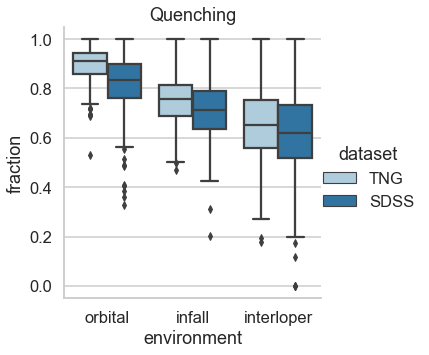

In [158]:
plot_enviroment2(cat0,cat1,'quenching')
plt.savefig('../plots/cluster_fractions_quenching_w_tng.png',facecolor='w',transparent=False,dpi=150)

<Figure size 288x576 with 0 Axes>

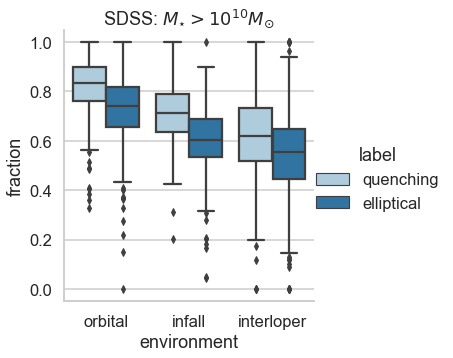

In [159]:
plot_enviroment3(cat1,'quenching','elliptical',
                 title=r'SDSS: $M_{\star}>10^{10}M_{\odot}$',
                 outname='../plots/cluster_fractions_quenching_ellipitical.png')

<Figure size 288x576 with 0 Axes>

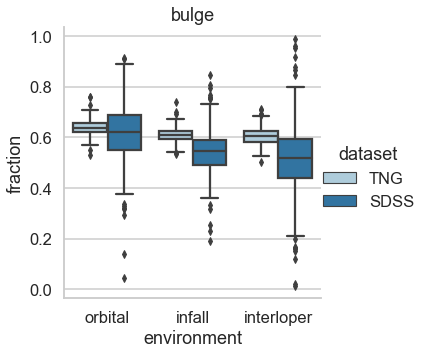

In [147]:
plot_enviroment2(cat0,cat1,'bulge')

<Figure size 432x288 with 0 Axes>

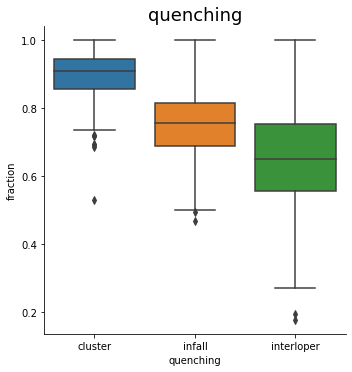

In [36]:
df = plot_enviroment(cat0,'quenching')

<Figure size 432x288 with 0 Axes>

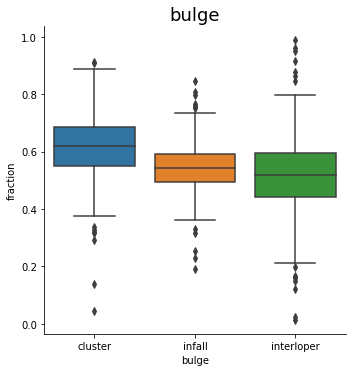

In [37]:
df = plot_enviroment(cat1,'bulge')

<Figure size 432x288 with 0 Axes>

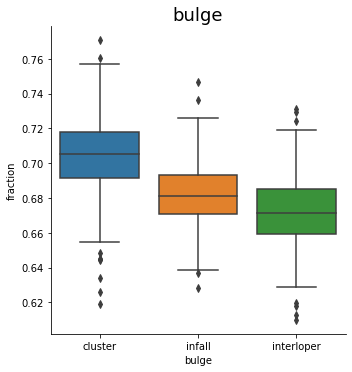

In [130]:
df = plot_enviroment(cat,'bulge')

In [30]:
mytype='quenching'

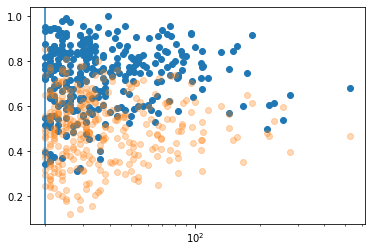

In [32]:
plt.scatter(cat['N200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.axvline(20)
plt.xscale('log')

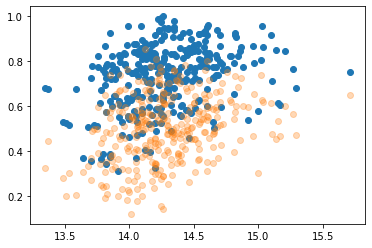

In [31]:
plt.scatter(cat['logM200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['logM200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

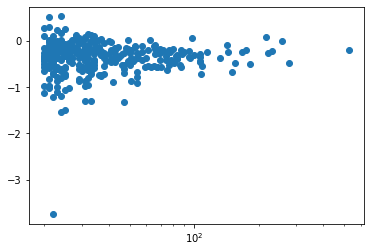

In [344]:
plt.scatter(cat['N200'],cat['qf2_%s'%(mytype)])
plt.xscale('log')

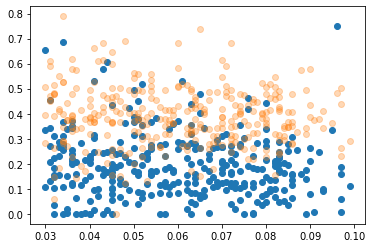

In [345]:
plt.scatter(cat['z'],cat['fo_%s'%(mytype)])
plt.scatter(cat['z'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

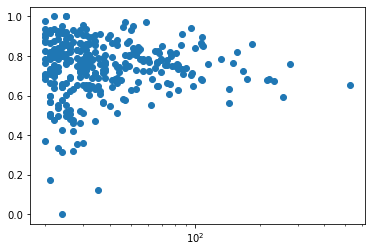

In [333]:
plt.scatter(cat['N200'],cat['fo_elliptical'])
plt.xscale('log')

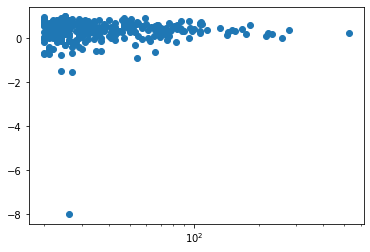

In [334]:
plt.scatter(cat['N200'],cat['qf1_elliptical'])
plt.xscale('log')

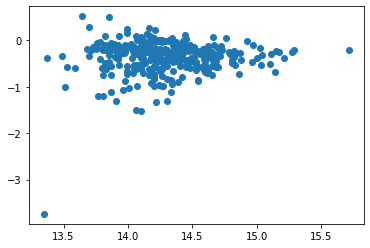

In [335]:
plt.scatter(cat['logM200'],cat['qf2_sf'])

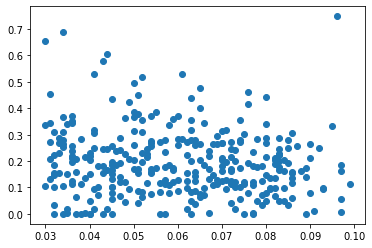

In [336]:
plt.scatter(cat['z'],cat['fo_sf'])

In [337]:
labels_mpr = ['quenching', 'sf', 'elliptical', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

In [338]:
mytype1='quenching'
mytype2='unclas'

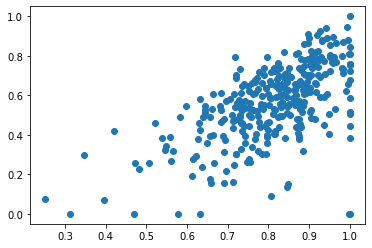

In [339]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [340]:
mytype1='elliptical'
mytype2='quenching'
mytype3='unclas'

(-0.02, 1.02)

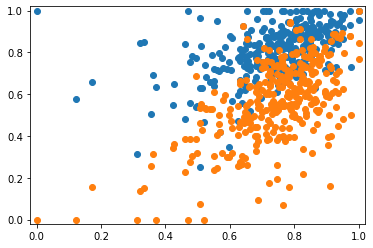

In [341]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype3)])
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [11]:
cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_smass.csv')

In [21]:
halo_mass = cat['logM200']
n200 = cat['N200']

In [153]:
smasso = cat['smasso']
smassi = cat['smassi']
sfro = cat['sfro']
sfri = cat['sfri']

ssfro = sfro-smasso
ssfri = sfri-smassi

In [154]:
fstellar = smasso-halo_mass

In [155]:
OIstelar = smasso-smassi

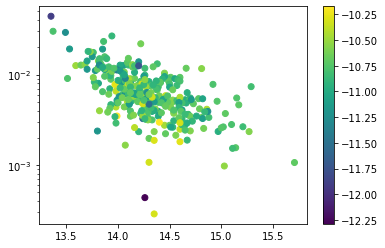

In [156]:
plt.scatter(halo_mass,10**fstellar,c=ssfro)
plt.yscale('log')
plt.colorbar()

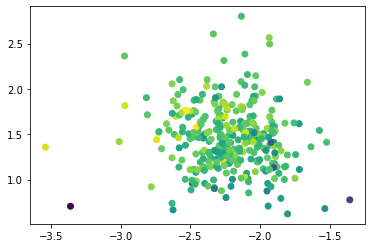

In [157]:
# plt.plot([11.,13.5],[11.,13.5],'k--')
plt.scatter(fstellar,sfri,c=ssfro)

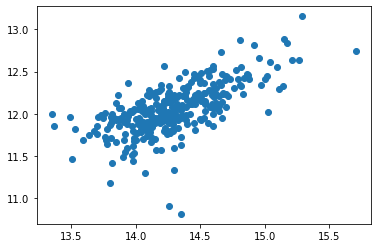

In [158]:
plt.scatter(halo_mass,smasso)

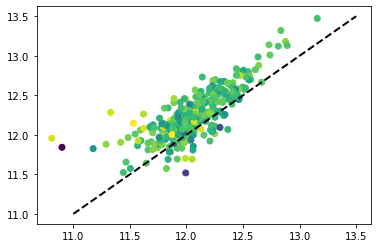

In [159]:
plt.plot([11.,13.5],[11.,13.5],'k--',lw=2)
plt.scatter(smasso,smassi,c=ssfro)

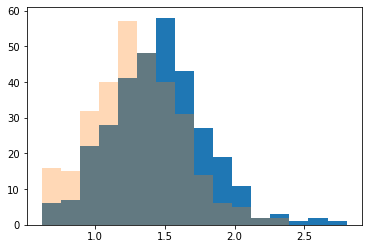

In [176]:
a = plt.hist(sfri,bins=16)
a = plt.hist(sfro,bins=a[1],alpha=0.3)

In [178]:
a[1]

array([0.62052656, 0.75684003, 0.89315349, 1.02946696, 1.16578043,
       1.30209389, 1.43840736, 1.57472083, 1.71103429, 1.84734776,
       1.98366123, 2.11997469, 2.25628816, 2.39260163, 2.52891509,
       2.66522856, 2.80154203])

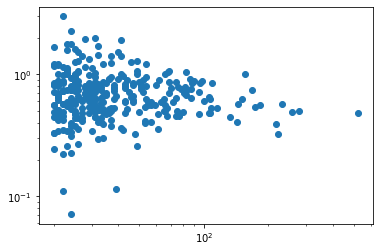

In [161]:
plt.scatter(n200,10**OIstelar)
plt.yscale('log')
plt.xscale('log')

In [162]:

from utils import gaussian_kde

In [163]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [173]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.2)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [179]:
# grid
xmin, xmax = 11., 13.0
# ymin, ymax = -10.0, -11.75
ymin, ymax = 0.4, 2.5
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

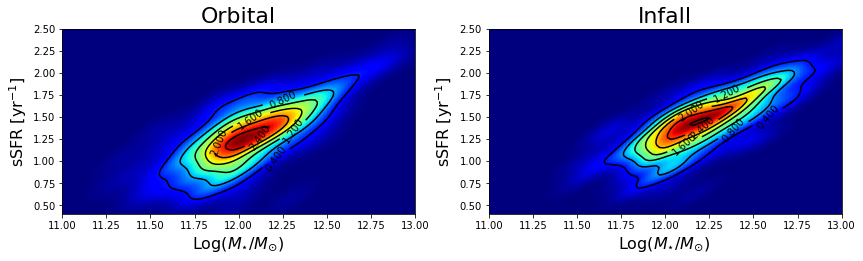

In [180]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
sSFRmass(smasso,sfro,np.ones_like(smasso),ax=axis[0],title='Orbital')
sSFRmass(smassi,sfri,np.ones_like(smasso),ax=axis[1],title='Infall')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

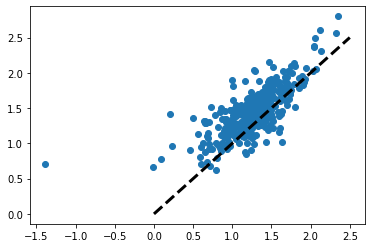

In [183]:
plt.scatter(sfro,sfri)
plt.plot([0.,2.5],[0.,2.5],'k--',lw=3)

In [224]:
# fq = np.array(cat0['fo_spiral'])
fq = np.array(cat['smasso_sf'])

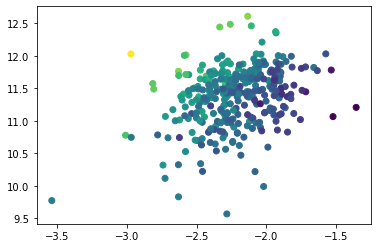

In [225]:
plt.scatter(fstellar,fq,c=halo_mass)
# plt.ylim(11)